# SVM Lab

In [62]:
import numpy as np, random , math
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [63]:
np.random.seed(0)
classA = np.concatenate((
    np.random.randn(10, 2) * 0.2 + [1.5, 0.5],
    np.random.randn(10, 2) * 0.2 + [-1.5, 0.5]))
classB = np.random.randn(20, 2) * 0.2 + [0.0, -0.5]

inputs = np.concatenate((classA, classB))
targets = np.concatenate((np.ones(classA.shape[0]), -np.ones(classB.shape[0])))

N = inputs.shape[0] # Number of rows ( samples )
permute = list(range(N))
random.shuffle(permute)
inputs = inputs[permute, : ]
targets = targets[permute]

In [71]:
class SVM:
    def __init__(self, kernal, inputs, targets, classA, classB, p = None, sig = None, C = None):
        
        
        self.p = p
        self.sig = sig
        self.C = C
        self.kernal = kernal
        self.inputs = inputs
        self.targets = targets
        self.classA = classA
        self.classB = classB
        self.N = inputs.shape[0]
        self.P = self.calculateP()
        self.start = np.zeros(self.N)
        self.b = 0
        
        
        self.kernals(self.inputs, self.inputs)
            
        B = [(0, self.C) for b in range(N)]
        constraint = {'type':'eq', 'fun':self.zerofun},

        ret = minimize(self.objective, self.start, bounds = B, constraints = constraint)
        alpha = ret["x"]

        self.nz_alpha = self.alphaNoneZero(alpha)
        self.b = self.calculateB(self.nz_alpha)
    
    def calculateP(self):
        P = np.zeros((self.N,self.N))
        
        for i in range(N):
            for j in range(N):
                P[i,j] = self.targets[i]*self.targets[j]*self.kernals(self.inputs[i], self.inputs[j])
        return P
        
        #ntargets = self.targets.reshape((len(self.targets),1))
        #return np.dot(ntargets,np.transpose(ntargets))*self.kernals(self.inputs, self.inputs)
    
    def kernals(self, x,y):
        if self.kernal == "linear":
            return np.dot(x, np.transpose(y))
        if self.kernal == "poly":
            return (np.dot(x, np.transpose(y)) + 1)**self.p
        if self.kernal == "rbf":
            return np.exp(-(np.linalg.norm(x - y)**2)/(2*self.sig**2))
        
    def objective(self,a):
        at = a.reshape((len(a),1))
        return 0.5*np.sum(np.dot(at,np.transpose(at))*self.P) - np.sum(a)
    
    def zerofun(self, a):
        return np.dot(a, self.targets)
    
    def calculateB(self, alphas):
        s = alphas[2][1]
        ts = alphas[2][2]
        for item in alphas:
            a, x, t = item[0], item[1], item[2]
            self.b += a*t*self.kernals(s,x)
        return self.b - ts
    
    def indicator(self,x,y, alphas):
        s = np.array([x,y])
        ind = 0
        for item in alphas:
            a, x, t = item[0], item[1], item[2] 
            ind += a*t*self.kernals(s,x)  
        return ind - self.b
    
    def alphaNoneZero(self,alphas):
        none_zero_alphas = list()
        for i, a in enumerate(alphas):
            if a > 10**-5:
                none_zero_alphas.append([a, self.inputs[i], self.targets[i]])
        return none_zero_alphas
    
    def plotSVM(self, name):
        plt.figure(figsize=(6,6))
        plt.plot([p[0] for p in self.classA], [p[1] for p in self.classA ], "b.", markersize=15)
        plt.plot([p[0] for p in self.classB], [p[1] for p in self.classB ], "r.", markersize=15)
        plt.axis("equal") # Force same scale on both axes


        xgrid = np.linspace(-2,2)
        ygrid = np.linspace(-2,2)
        grid = np.array([[self.indicator(x,y, self.nz_alpha) for x in xgrid] for y in ygrid])
        plt.xlabel('x')
        plt.ylabel('y')

        plt.contour(xgrid, ygrid, grid, (-1.0, 0.0, 1.0),
                   colors = ("red", "black", "blue"),
                   linewidths = (1,3,1))
        #plt.savefig(name + "sig_"+str(self.sig)+"_p_" + str(self.p)+ "_C_" + str(self.C)+".jpg") 
        plt.close()
        fig = plt.figure(figsize=(12,10))
        ax = plt.axes(projection='3d')
        ax.view_init(30, 70)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z');
        ax.contour3D(xgrid, ygrid, grid, 50, cmap='binary')
        ax.plot([p[0] for p in self.classA], [p[1] for p in self.classA ], "b.", markersize=15)
        ax.plot([p[0] for p in self.classB], [p[1] for p in self.classB ], "r.", markersize=15)
        plt.close()
        plt.show()
        
    def rb(self):
        return self.b
    
    


## 0. Learning Objectives
 - Use the mathematical formulation of the optimization task,
 - Formulate the indicator function and explain how it relates to the outcome of the classification,
 - Predict and explain the outcome of using different kernels,
 - Explain the effect of the C-value when using slack variables.

### 1. Move the clusters around and change their sizes to make it easier or harder for the classifier to find a decent boundary. Pay attention to when the optimizer (minimize function) is not able to find a solution at all.

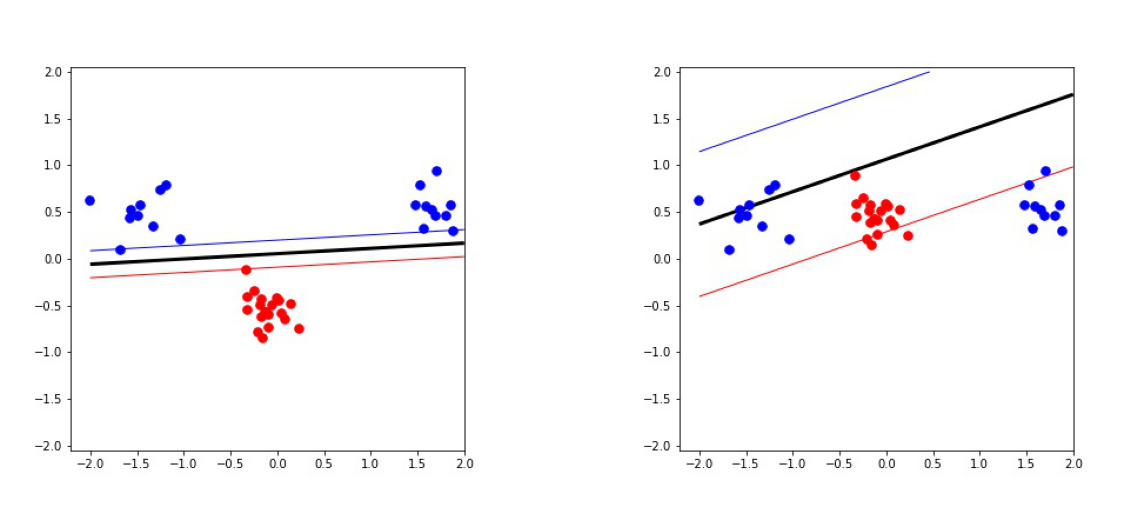

In [65]:
import matplotlib.image as mpimg
from matplotlib import rcParams

# figure size in inches optional
rcParams['figure.figsize'] = 20 ,20

# read images
img_A = mpimg.imread('easy_svmplot.jpg')
img_B = mpimg.imread('hard_svmplot.jpg')

# display images
fig, ax = plt.subplots(1,2)
ax[0].axis("off")
ax[1].axis("off")

ax[0].imshow(img_A);
ax[1].imshow(img_B);

### 2. Implement the two non-linear kernels. You should be able to classify very hard data sets with these. 

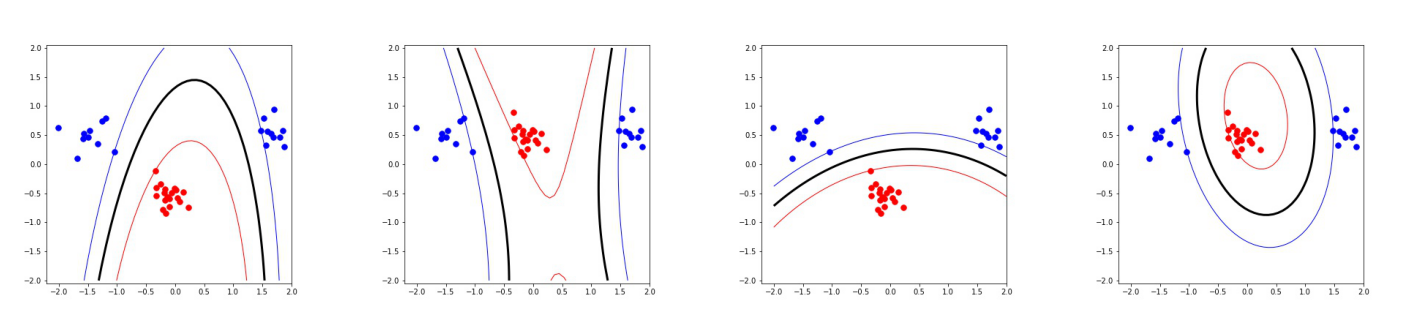

In [66]:
# figure size in inches optional
rcParams['figure.figsize'] = 20 ,20

# read images
img_p1 = mpimg.imread('easy_poly_svmplot.jpg')
img_p2 = mpimg.imread('hard_poly_svmplot.jpg')

img_b1 = mpimg.imread('easy_rbf_svmplot.jpg')
img_b2 = mpimg.imread('hard_rbf_svmplot.jpg')


# display images
fig, ax = plt.subplots(1,4)

fig.tight_layout()

ax[0].axis("off")
ax[1].axis("off")
ax[2].axis("off")
ax[3].axis("off")

ax[0].imshow(img_p1);
ax[1].imshow(img_p2);
ax[2].imshow(img_b1);
ax[3].imshow(img_b2);

### 3. The non-linear kernels have parameters; explore how they influence the decision boundary. Reason about this in terms of the biasvariance trade-off.

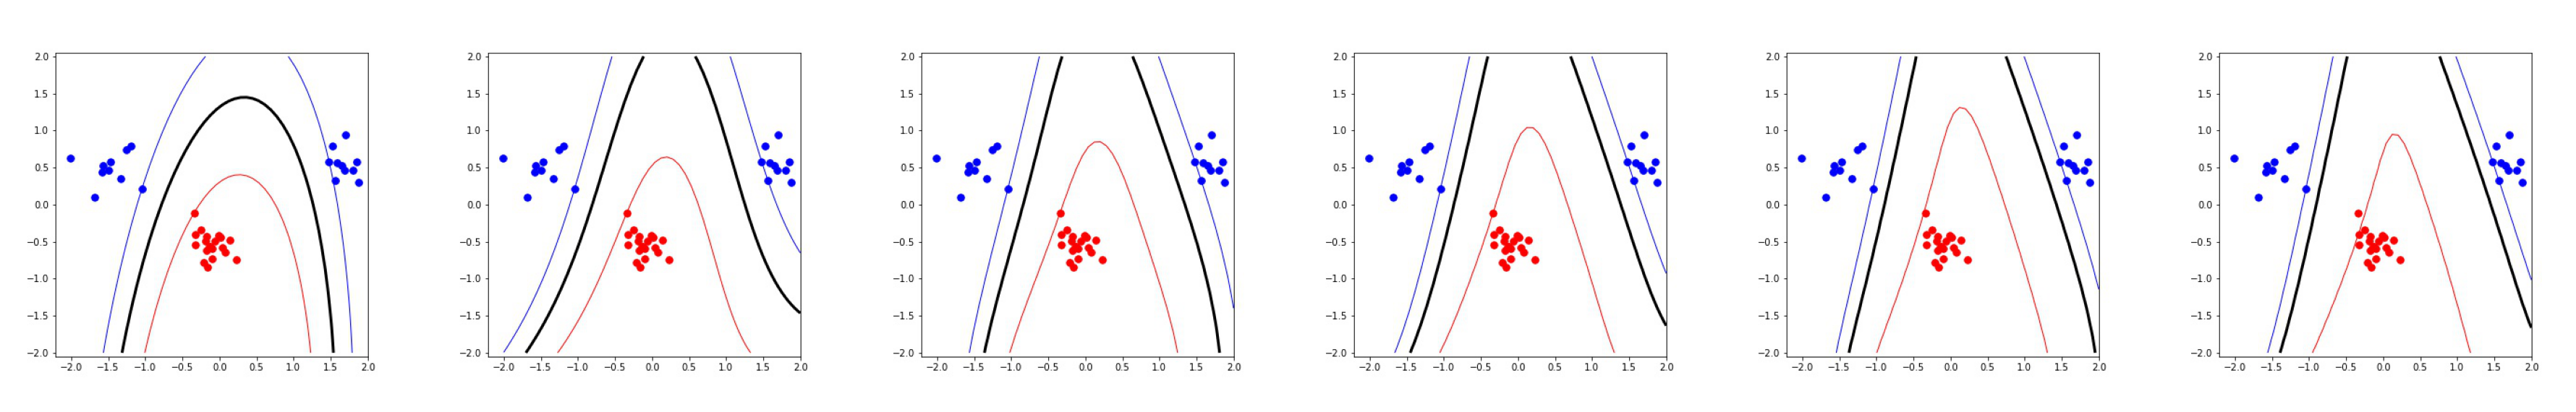

In [72]:
rcParams['figure.figsize'] = 50 ,50
ps = [2,3,4,5,6,7]
for p in ps:
    poly_SVM = SVM("poly", inputs, targets, classA, classB, p)
    poly_SVM.plotSVM("poly")
    
fig, ax = plt.subplots(1,6)
fig.tight_layout()
for i in range(len(ps)):
    img = mpimg.imread("poly" + "sig_"+ str(None)+"_p_" + str(ps[i]) +".jpg")
    ax[i].axis("off")
    ax[i].imshow(img);
    


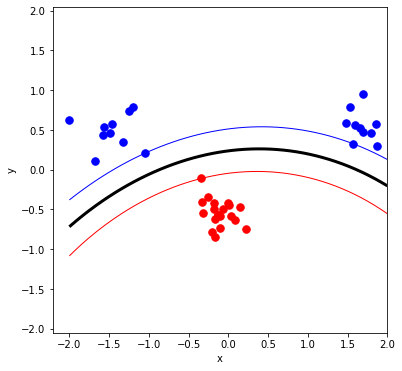

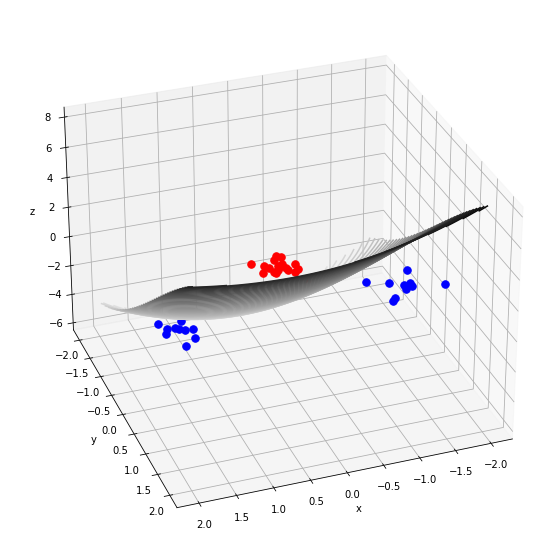

In [60]:
poly_SVM = SVM("rbf", inputs, targets, classA, classB, p= None, sig = 4)
poly_SVM.plotSVM("rbf")

In [49]:
rcParams['figure.figsize'] = 50 ,50
sigs = [0.5,2,4,8,16,32]
for sig in sigs:
    poly_SVM = SVM("rbf", inputs, targets, classA, classB, p= None, sig = sig)
    poly_SVM.plotSVM("rbf")
    
fig, ax = plt.subplots(1,6)
fig.tight_layout()
for i in range(len(sigs)):
    img = mpimg.imread("rbf" + "sig_"+ str(sigs[i])+"_p_" + str(None) +".jpg")
    ax[i].axis("off")
    ax[i].imshow(img);
    

### 4. Explore the role of the slack parameter C. What happens for very large/small values?

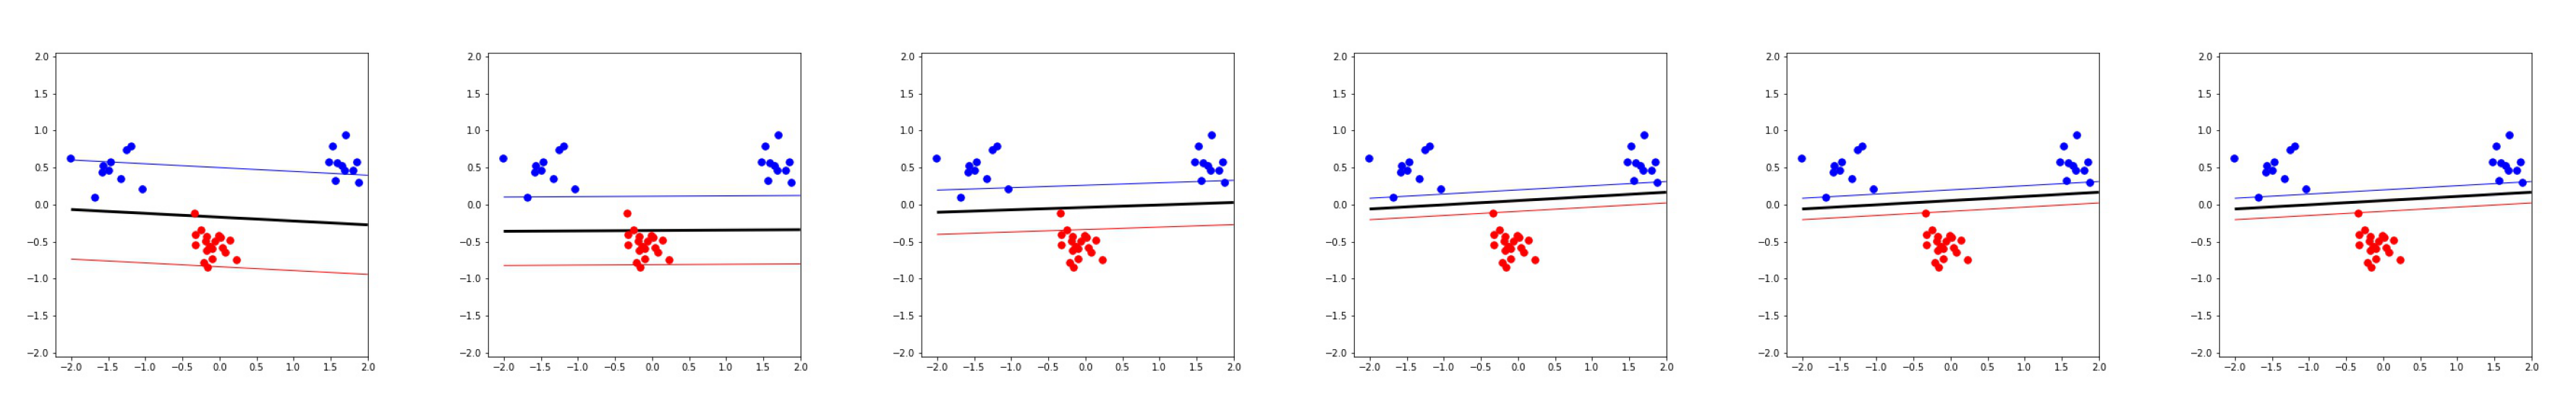

In [61]:
rcParams['figure.figsize'] = 50 ,50
Cs = [0.1 ,0.5, 4, 32, 128, 256]
sig = 4
for i in range(len(Cs)):
    svm = SVM("linear", inputs, targets, classA, classB, p= None, sig = None, C = Cs[i])
    svm.plotSVM("linear")
    
fig, ax = plt.subplots(1,6)
fig.tight_layout()
for i in range(len(Cs)):
    img = mpimg.imread("linear" + "sig_"+ str(None)+"_p_" + str(None) + "_C_" + str(Cs[i])+".jpg")
    ax[i].axis("off")
    ax[i].imshow(img);

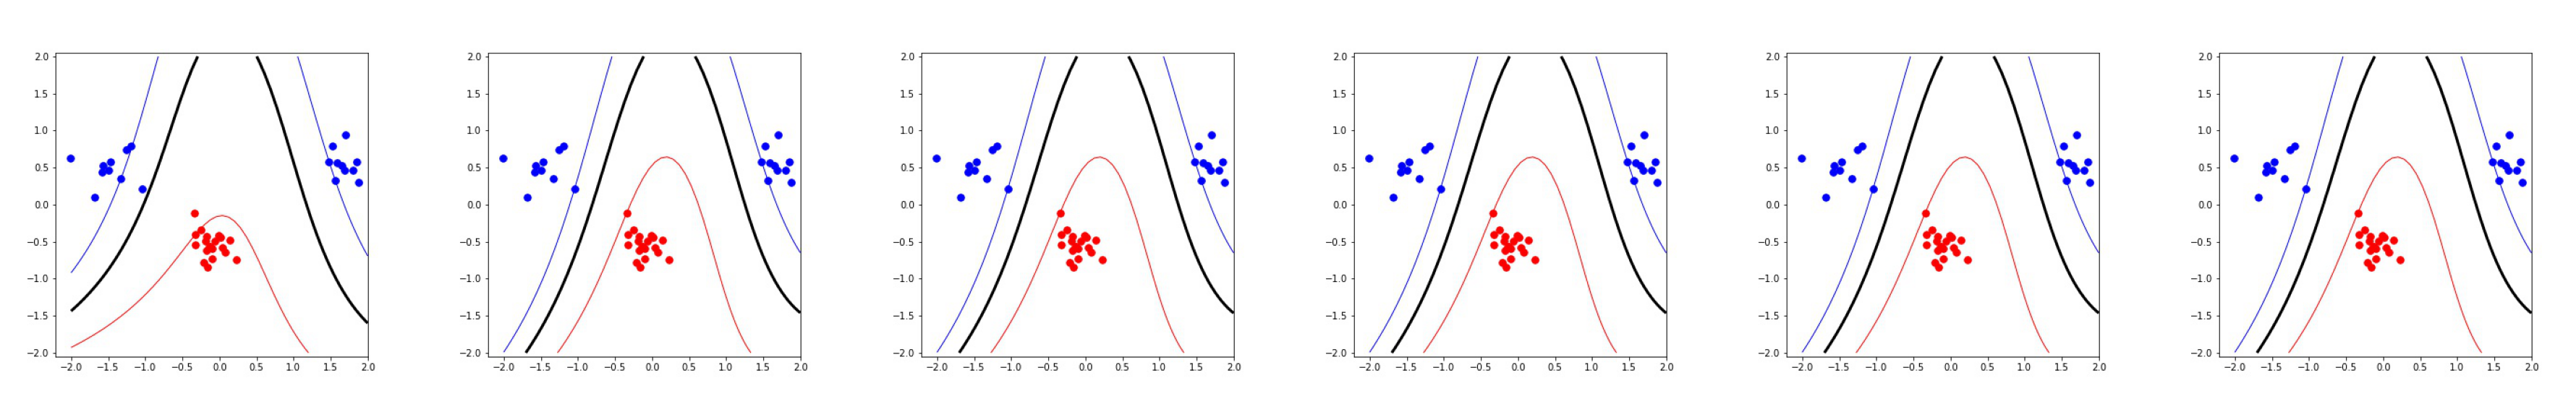

In [62]:
rcParams['figure.figsize'] = 50 ,50
Cs = [0.1 ,0.5, 4, 32, 128, 256]
p = 3
for i in range(len(Cs)):
    svm = SVM("poly", inputs, targets, classA, classB, p= p, sig = None, C = Cs[i])
    svm.plotSVM("poly")
    
fig, ax = plt.subplots(1,6)
fig.tight_layout()
for i in range(len(Cs)):
    img = mpimg.imread("poly" + "sig_"+ str(None)+"_p_" + str(p) + "_C_" + str(Cs[i])+".jpg")
    ax[i].axis("off")
    ax[i].imshow(img);

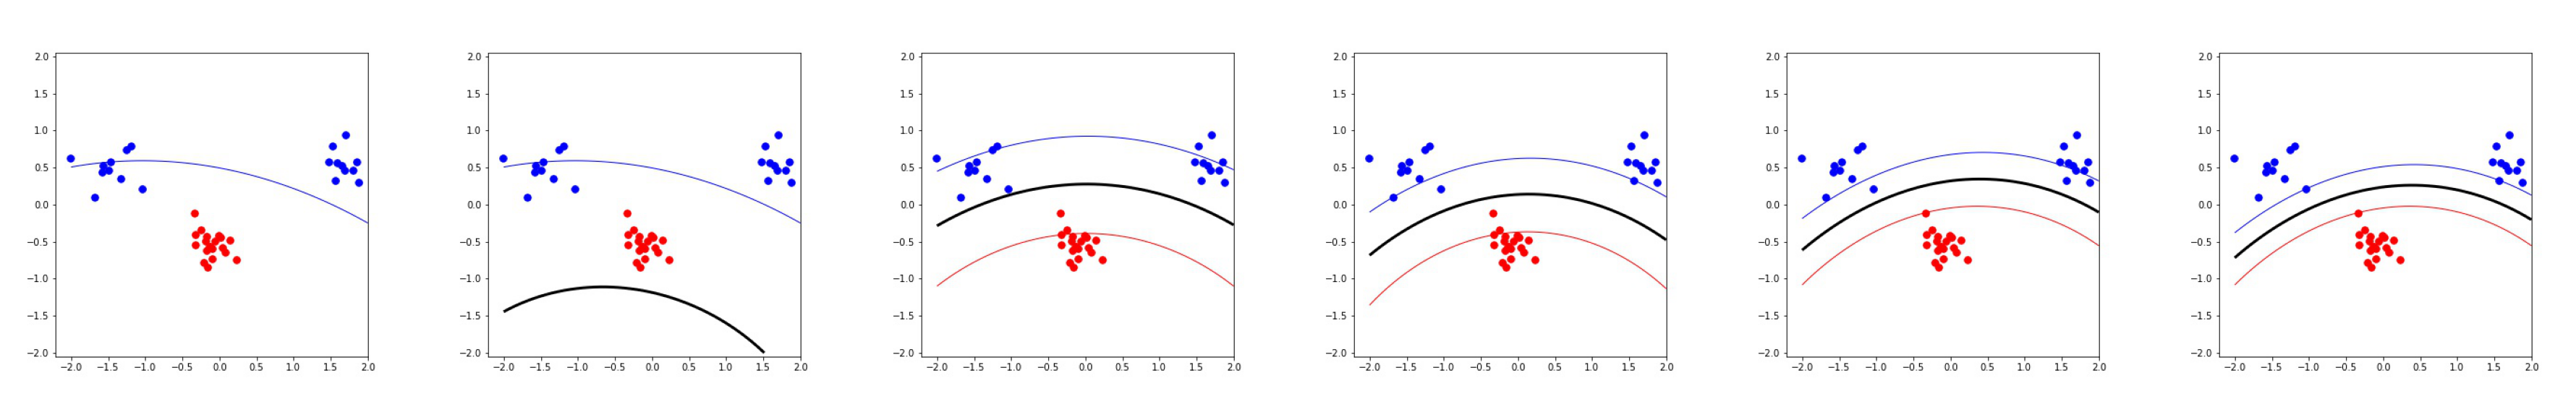

In [63]:
rcParams['figure.figsize'] = 50 ,50
Cs = [0.1 ,0.5, 4, 32, 128, 256]
sig = 4
for i in range(len(Cs)):
    svm = SVM("rbf", inputs, targets, classA, classB, p= None, sig = sig, C = Cs[i])
    svm.plotSVM("rbf")
    
fig, ax = plt.subplots(1,6)
fig.tight_layout()
for i in range(len(Cs)):
    img = mpimg.imread("rbf" + "sig_"+ str(4)+"_p_" + str(None) + "_C_" + str(Cs[i])+".jpg")
    ax[i].axis("off")
    ax[i].imshow(img);

### 5. Imagine that you are given data that is not easily separable. When should you opt for more slack rather than going for a more complex model (kernel) and vice versa?

- Slack rather then complex model should be used when the data is noicy rather than complicated to classify ( few overlaps in data but complex data structures) . 
